In [1]:
from PostProcessing import *
import pandas as pd

2024-01-02 16:44:52.676608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 16:44:52.852677: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-02 16:44:52.857284: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /totten_1/chenggong/trunk-jpl/externalpackages/proj/install/lib:/totten_1/chenggong

In [2]:
# 1D 6x20
modelFolder = 'Models_Kubeflow/1D/'
df = findAllExps(projPath=modelFolder, dimensions=1)
data = addErrors(df, projPath=modelFolder)
filename = "./Results/1D_6x20_results.csv"
data.to_csv(filename, index_label=False)

-> size before cleanup: (140, 15)
-> size after cleanup: (140, 15)
-> Keys before cleanup: ['SSA1D']
-> Keys after cleanup: ['SSA1D']
-> Keys before cleanup:  0    []
Name: noise, dtype: object
-> Keys after cleanup: 0    []
Name: noise, dtype: object
-> Keys before cleanup: ['SSA1D']
-> Keys after cleanup: ['SSA1D']
Loop over the whole dataframe: 0/140
Loop over the whole dataframe: 100/140


In [3]:
df = pd.read_csv('Results/1Dresults.csv'); df = upscaleByWeights(df)
# df = pd.read_csv('Results/1D_6x20_results.csv')

path = os.path.join("./matlab_SSA/DATA/Helheim_Weertman_iT080_PINN_flowline_CF_2dInv.mat")
x, Exact_vel, X_star, u_star, X_u_train, u_train, X_f, X_bc, u_bc, X_cf, n_cf, xub, xlb, uub, ulb, mu = prep_Helheim_data_flowline(path, 50, 100)
C_true = u_star[:,3:4]


In [4]:
# pre-processing
df = scaleMseC(df, C_true=C_true)

In [5]:
print(df.groupby(['wh'], as_index=False).size())

    wh  size
0  0.0   263
1  1.0   446
2  2.0  1179
3  3.0  4516
4  4.0  2677
5  5.0   966
6  6.0   421


In [6]:
print(df[df['wh']==3].groupby(['layers','neurons'], as_index=False).size())

   layers  neurons  size
0       4       20   648
1       6       10   140
2       6       20   176
3       8       10   130
4       8       20  1568
5       8       40   818
6      10       10   797
7      16       10   239


In [7]:
print(df[(df['wh']==3) & (df['layers']==6) & (df['neurons']==20)].groupby(['wfc-wf','wf'], as_index=False).size())

    wfc-wf    wf  size
0     10.0   2.0    19
1     10.0   3.0     2
2     10.0   4.0    19
3     10.0   5.0     2
4     10.0   6.0    19
5     10.0   7.0     2
6     10.0   8.0    19
7     10.0   9.0     2
8     10.0  10.0    23
9     10.0  12.0    23
10    10.0  14.0    23
11    10.0  16.0    23


In [8]:
df3 = df[(df['wh']==3) 
         & (df['layers']==8) 
         & (df['neurons']==20) 
         & (df['wfc-wf']==6)]  
print(df3.groupby(['wf'],as_index=False).size())

      wf  size
0    2.0    86
1    3.0    40
2    4.0    86
3    5.0    40
4    6.0    86
5    7.0    39
6    8.0    84
7    9.0    39
8   10.0    15
9   12.0    15
10  14.0    15
11  16.0    15


In [9]:
# df3 = df[(df['wh']==3) 
#          & (df['layers']==8) 
#          & (df['neurons']==20) 
#          & (df['wfc-wf']==6)
#          & (df['history length']>10200)]  
# print(df3.groupby(['wf'],as_index=False).size())

In [10]:
df3.keys()

Index(['index', 'Name', 'prefix', 'NN', 'layers', 'neurons', 'Date', 'Time',
       'weights', 'wu', 'wh', 'wC', 'wf', 'wfc', 'noise', 'wfc-wf', 'test100',
       'testmean100', 'test', 'mse_f1100', 'mse_f1mean100', 'mse_f1',
       'mse_h100', 'mse_hmean100', 'mse_h', 'mse_H100', 'mse_Hmean100',
       'mse_H', 'mse_u100', 'mse_umean100', 'mse_u', 'history length',
       'rel error', 'abs error'],
      dtype='object')

In [11]:
uniWeights = [eval(w) for w in df3['weights'].unique()]


In [12]:
print(df3.groupby(['weights'], as_index=False).size())

                        weights  size
0   [5.0, 3.0, 5.0, 10.0, 16.0]    15
1   [5.0, 3.0, 5.0, 12.0, 18.0]    15
2   [5.0, 3.0, 5.0, 14.0, 20.0]    15
3   [5.0, 3.0, 5.0, 16.0, 22.0]    15
4     [5.0, 3.0, 5.0, 2.0, 8.0]    86
5     [5.0, 3.0, 5.0, 3.0, 9.0]    40
6    [5.0, 3.0, 5.0, 4.0, 10.0]    86
7    [5.0, 3.0, 5.0, 5.0, 11.0]    40
8    [5.0, 3.0, 5.0, 6.0, 12.0]    86
9    [5.0, 3.0, 5.0, 7.0, 13.0]    39
10   [5.0, 3.0, 5.0, 8.0, 14.0]    84
11   [5.0, 3.0, 5.0, 9.0, 15.0]    39


In [13]:
def visualizeErrors(df, variableWeights='wf', weights=None, features=['mse_u', 'mse_h', 'mse_H', 'mse_f1', 'test'] ): #{{{    # weights
    # pick the intersetion of wf and the data in df
    if not weights:
        weights = np.sort(df[variableWeights].unique())
    else:
        weights = np.sort(list(set((df[variableWeights].unique()),).intersection(set(weights))))

    # find the variable weights
    uniWeights = [eval(w) for w in (df[df[variableWeights].isin(weights)].sort_values(variableWeights))['weights'].unique()]
    # check if the size of the two groups are the same 
    assert(len(uniWeights) == len(weights))
    
    # colors indicates different weights combinations
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    lims = [[1e3, 1e8], [1e0, 1e6], [1e0, 1e6], [1e-1, 1e13], [1e4,1e7]]

    Nkey = len(features)-1

    # plot
    fig, axs = plt.subplots(Nkey, Nkey, figsize=(20,16))

    for cid, w in enumerate(weights):
        err=df[df[variableWeights]==w]
        label = '$'+ variableWeights + '=10^{-'+str(w)+'}$'

        for i in range(Nkey):
            for j in range(i,Nkey):
                ax = axs[i][j]
                ax.scatter(err[features[j+1]], err[features[i]], c=colors[cid], label=label, s=20)
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.set_xlim(lims[j+1])
                ax.set_ylim(lims[i])

        # add labels
        for i in range(len(features)-1):
            ax = axs[i][0]
            ax.set_ylabel(features[i])
        for j in range(len(features)-1):
            ax = axs[-1][j]
            ax.set_xlabel(features[j+1])

    ax.legend(bbox_to_anchor=(1.1, 1.5))
    
    return weights, uniWeights

(array([ 4,  6,  7,  8,  9, 10, 12]),
 [[5.0, 3.0, 5.0, 4.0, 10.0],
  [5.0, 3.0, 5.0, 6.0, 12.0],
  [5.0, 3.0, 5.0, 7.0, 13.0],
  [5.0, 3.0, 5.0, 8.0, 14.0],
  [5.0, 3.0, 5.0, 9.0, 15.0],
  [5.0, 3.0, 5.0, 10.0, 16.0],
  [5.0, 3.0, 5.0, 12.0, 18.0]])

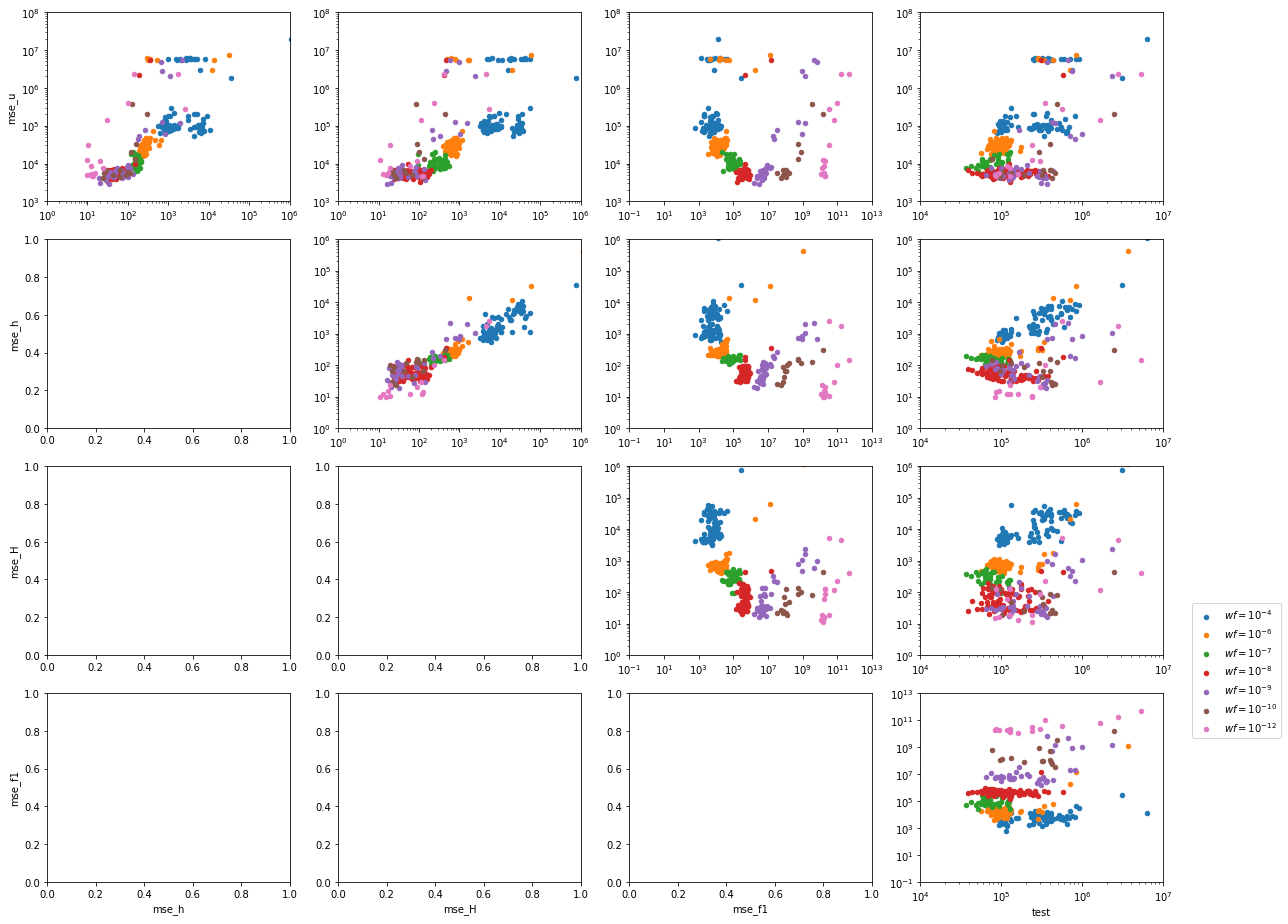

In [14]:
visualizeErrors(df3, weights=[4,6,7,8,9,10,12])

In [15]:
def plotErrors(ax, df, xkey='mse_f1', ykey='mse_u', variableWeights='wf', variableName='w_f', weights=None): #{{{ 
    if not weights:
        weights = np.sort(df[variableWeights].unique())
    else:
        weights = np.sort(list(set((df[variableWeights].unique()),).intersection(set(weights))))

    # find the variable weights
    uniWeights = [eval(w) for w in (df[df[variableWeights].isin(weights)].sort_values(variableWeights))['weights'].unique()]
    # check if the size of the two groups are the same 
    assert(len(uniWeights) == len(weights))
    
    # colors indicates different weights combinations
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    lims = [[1e3, 1e8], [1e0, 1e6], [1e0, 1e6], [1e-1, 1e13], [1e4,1e7]]

    for cid, w in enumerate(weights):
        err=df[df[variableWeights]==w]
        label = '$'+ variableName + '=10^{-'+str(w)+'}$'
        ax.scatter(err[xkey], err[ykey], c=colors[cid], label=label, s=20)

    ax.set_xscale('log')
    ax.set_yscale('log')
        
    ax.set_ylabel(ykey)
    ax.set_xlabel(xkey)
    
    ax.legend()
    
    return ax

In [16]:
weights = [4,6,7,8,9,10,12]
labels = ['$w_\Omega=10^{'+str(-int(w)-3)+'}$' for w in weights]

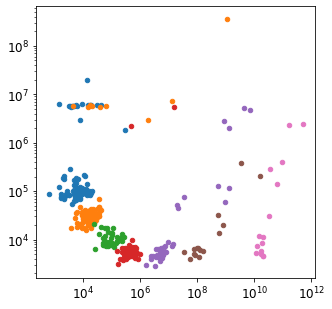

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax = plotErrors(ax, df3, weights=weights)
ax.set_xlabel('$\mathcal{L}_\Omega$', fontsize=30)
ax.set_ylabel('$\epsilon_u^{MSE}$', fontsize=30)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
lgd = ax.legend(labels, bbox_to_anchor=(1, 1))
ax.set_xlabel('', fontsize=30)
ax.set_ylabel('', fontsize=30)
lgd.remove()
fig.savefig("Figures/u_f.pdf", format="pdf", bbox_inches='tight')

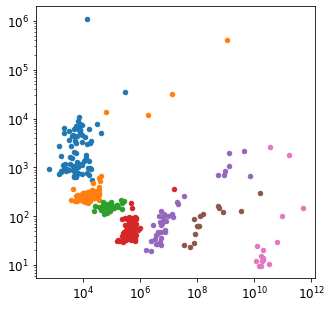

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
plotErrors(ax, df3, ykey='mse_h', weights=[4,6,7,8,9,10,12])
ax.set_xlabel('$\mathcal{L}_\Omega$', fontsize=30)
ax.set_ylabel('$\epsilon_s^{MSE}$', fontsize=30)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
lgd = ax.legend(labels, bbox_to_anchor=(1, 1))
ax.set_xlabel('', fontsize=30)
ax.set_ylabel('', fontsize=30)
lgd.remove()
fig.savefig("Figures/s_f.pdf", format="pdf", bbox_inches='tight')

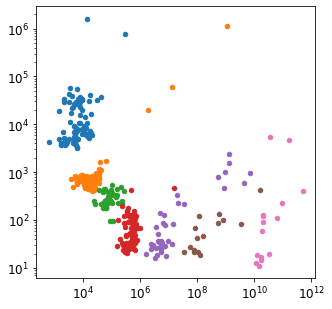

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
plotErrors(ax, df3, ykey='mse_H', weights=[4,6,7,8,9,10,12])
ax.set_xlabel('$\mathcal{L}_\Omega$', fontsize=30)
ax.set_ylabel('$\epsilon_H^{MSE}$', fontsize=30)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
lgd = ax.legend(labels, bbox_to_anchor=(1, 1))
ax.set_xlabel('', fontsize=30)
ax.set_ylabel('', fontsize=30)
lgd.remove()
fig.savefig("Figures/H_f.pdf", format="pdf", bbox_inches='tight')

# plotErrors(df3, ykey='mse_H', weights=[4,6,7,8,9,10,12])

In [32]:
wfgroup = df3.groupby("wf")

In [33]:
wfdata = df3[(df3["wf"]>3) & (df3["wf"]<14) & (df3["wf"]!=5)].groupby("wf").agg([np.mean, np.median, np.std])

In [34]:
wfdata

index                      layers             neurons              \
             mean  median          std   mean median  std    mean median  std   
wf                                                                              
4.0   6509.372093  6395.5  3222.979188    8.0    8.0  0.0    20.0   20.0  0.0   
6.0   5843.162791  5644.0  3555.287257    8.0    8.0  0.0    20.0   20.0  0.0   
7.0   5506.487179  5396.0  3203.056565    8.0    8.0  0.0    20.0   20.0  0.0   
8.0   4942.952381  5059.5  2982.801416    8.0    8.0  0.0    20.0   20.0  0.0   
9.0   5836.717949  4829.0  3467.446573    8.0    8.0  0.0    20.0   20.0  0.0   
10.0  5415.066667  4652.0  3275.009389    8.0    8.0  0.0    20.0   20.0  0.0   
12.0  5712.733333  5540.0  3098.405914    8.0    8.0  0.0    20.0   20.0  0.0   

              Date  ...         mse_u history length                        \
              mean  ...           std           mean   median          std   
wf                  ...                                                      
4.0   2.023073e+07  ...  2.969580e+06   14329.639535  14615.5   943.859759   
6.0   2.023073e+07  ...  3.891906e+07   14677.348837  14836.0   865.749315   
7.0   2.023074e+07  ...  3.519483e+03   14902.871795  14904.0    36.607577   
8.0   2.023073e+07  ...  6.375055e+05   14847.392857  14969.5   660.548002   
9.0   2.023074e+07  ...  1.222754e+06   13576.846154  14925.0  2026.239329   
10.0  2.023049e+07  ...  1.040142e+05   13425.466667  14784.0  2075.150007   
12.0  2.023049e+07  ...  8.184599e+05   10821.666667  10306.0  1279.213970   

     rel error                      abs error                        
          mean    median       std       mean     median        std  
wf                                                                   
4.0   0.218268  0.201011  0.123989  44.326327  40.821669  25.179981  
6.0   0.143876  0.125837  0.080292  29.218546  25.555147  16.305851  
7.0   0.108632  0.105615  0.016961  22.061230  21.448418   3.444492  
8.0   0.139425  0.127131  0.040312  28.314705  25.818088   8.186687  
9.0   0.208150  0.180637  0.100956  42.271623  36.684186  20.502378  
10.0  0.234768  0.227066  0.121245  47.677169  46.113026  24.622733  
12.0  0.277498  0.193682  0.235473  56.354870  39.333265  47.820346  

[7 rows x 69 columns]

In [35]:
abserr = wfdata['abs error']
relerr = wfdata['rel error']
test = wfdata['test']
testmean100 = wfdata['testmean100']

In [36]:
range(len(wfdata.index))

range(0, 7)

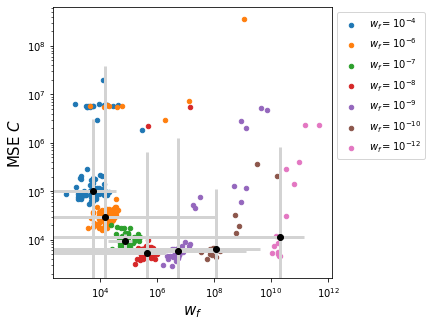

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax = plotErrors(ax, df3, weights=[4,6,7,8,9,10,12])
ax.set_xlabel('$\mathcal{L}_\Omega$', fontsize=15)
ax.set_ylabel('MSE $u$', fontsize=15)
ax.errorbar(wfdata['mse_f1']['median'], wfdata['mse_u']['median'],xerr=wfdata['mse_f1']['std'], yerr= wfdata['mse_u']['std'], fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
ax.set_xlabel('$w_f$', fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('MSE $C$', fontsize=15)
ax.legend(bbox_to_anchor=(1, 1))


In [38]:
test['mean']

wf
4.0     399088.266525
6.0     171942.935193
7.0      76731.761706
8.0     133663.763702
9.0     338254.754746
10.0    437201.824712
12.0    817771.500569
Name: mean, dtype: float64

In [39]:
wfdata.index

Float64Index([4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0], dtype='float64', name='wf')

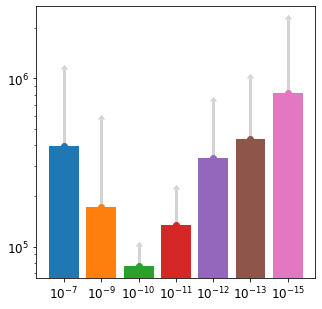

In [50]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, ax = plt.subplots(1, 1, figsize=(5,5))
for (ind,y,yerr,c) in zip(wfdata.index, test['mean'], test['std'], colors):
    ax.bar(['$10^{'+str(-int(ind)-3)+'}$'], y)
    ax.errorbar(['$10^{'+str(-int(ind)-3)+'}$'], y, 
            yerr=yerr, fmt='o', color=c, lolims=True,
            ecolor='lightgrey', elinewidth=3, capsize=0)
ax.set_xlabel('$w_\Omega$', fontsize=20)
ax.set_ylabel('${\epsilon_{Test}}^{MSE}$', fontsize=30)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('', fontsize=30)
ax.set_ylabel('', fontsize=30)
ax.set_yscale('log')
fig.savefig("Figures/test.pdf", format="pdf", bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(20,16))
ax = axs[0][0]
ax.errorbar(wfdata.index, abserr['mean'], yerr=abserr['std'])

ax = axs[0][1]
ax.errorbar(wfdata.index, relerr['mean'], yerr=relerr['std'])

ax = axs[1][0]
ax.errorbar(wfdata.index, test['mean'], yerr=test['std'])

ax = axs[1][1]
ax.errorbar(wfdata.index, testmean100['mean'], yerr=testmean100['std'])

<ErrorbarContainer object of 3 artists>

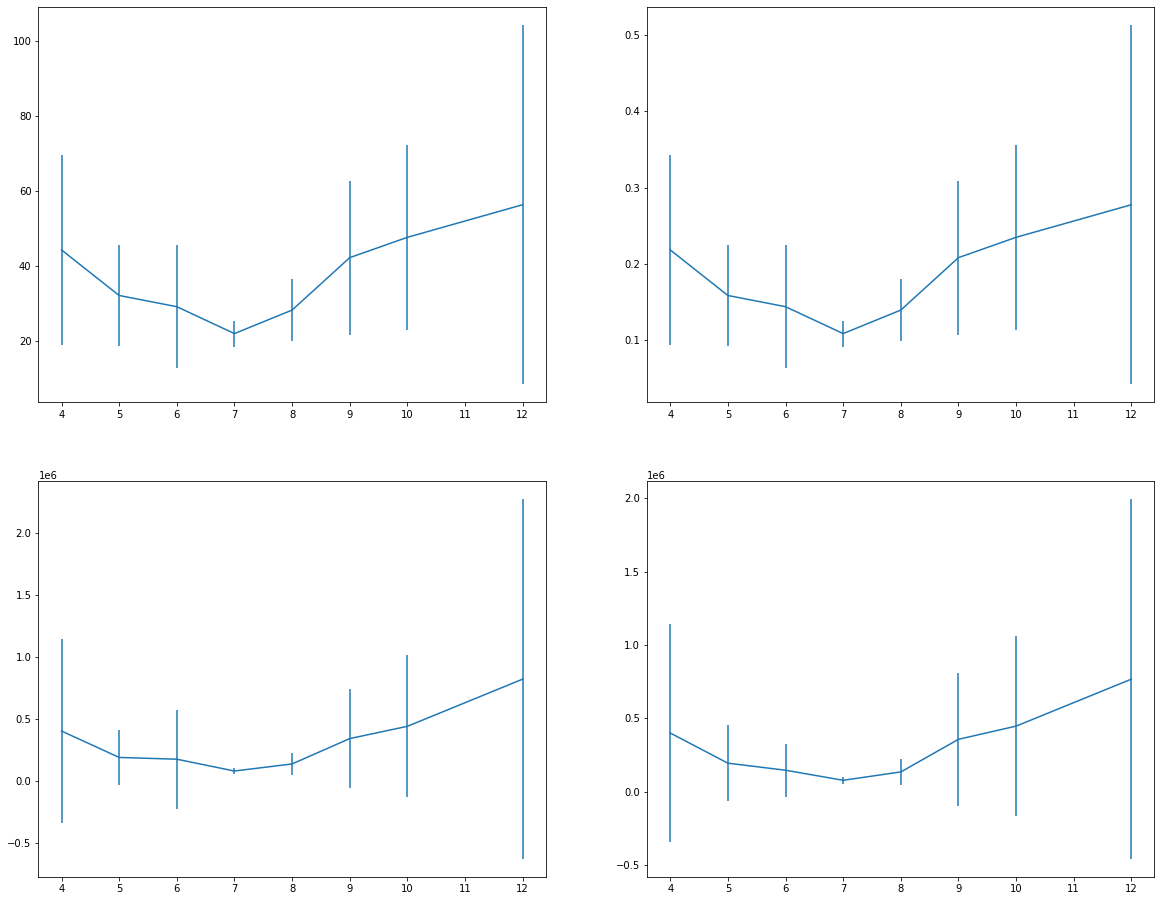

In [83]:


fig, axs = plt.subplots(2, 2, figsize=(20,16))
ax = axs[0][0]
ax.errorbar(wfdata.index, abserr['mean'], yerr=abserr['std'])

ax = axs[0][1]
ax.errorbar(wfdata.index, relerr['mean'], yerr=relerr['std'])

ax = axs[1][0]
ax.errorbar(wfdata.index, test['mean'], yerr=test['std'])

ax = axs[1][1]
ax.errorbar(wfdata.index, testmean100['mean'], yerr=testmean100['std'])

# ax.set_xscale('log')
# ax.set_yscale('log')


In [ ]:
(max(df3[df3['wf']==7.0]['test']))

In [ ]:
(max(df3[df3['wf']==8.0]['test']))

In [ ]:
df3[df3['wf']==10.0].sort_values('test')

In [ ]:
df3[df3['wf']==7.0].sort_values('test')

In [ ]:
df3[df3['wf']==6.0].sort_values('test')

In [ ]:
df.iloc[9142]